# Challenge 5

## Reading Materials

### Required Reading


## Activity 1
Due: November 8, 2018

In Activity 1, you are tasked with building a binary classifier based on SVM.
Each student has their own files, and should work in place.
```python
student_identity = 'netid'
training = '5challenge_training_' + student_identity + '.csv'
testing = '5challenge_testing_' + student_identity + '.csv'
```

### Data

The data is generated synthetically, one set for every student, using ```sklearn.datasets.make_classification```.


### Evaluation

Submissions will be scored according to Categorization Accuracy.
This Kaggle Metric requires the following columns: Id (String) and Category (String).
The solution file should be in a CSV format.


### File Descriptions

 * `5challenge_training_netid.csv` – the training data
 * `5challenge_testing_netid.csv` – the test data
 

### Deliverables

User submissions are evaluated by comparing their submission CSV to the ground truth solution CSV with respect to Categorization Accuracy.
Documents to be submitted are as follows.

__GitHub__: Every student should commit and push files.
 1. A pediction file; Fill column ```Class``` in the testing file.
     * `ECEN689-Fall2018 -> Challenges -> 5Files -> 5challenge_testing_netid.csv`
 2. Jupyter notebook code or Python code within your own directory.
 3. Describe the Kernel you used for your SVM. Plot the decision region juxtaposed with the training set.
     * `ECEN689-Fall2018 -> Students -> GitHubID -> 5challenge_testing_netid.csv`


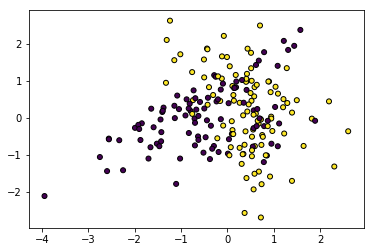

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from mlxtend.plotting import plot_decision_regions

student_identity = 'chharish775'
filenameToRead = '5challenge_training_' + student_identity + '.csv'
training_df=pd.read_csv("C:/Users/harish/Documents/GitHub/ECEN689-Fall2018/Challenges/5Files/"+ filenameToRead)

#print(training_df.head())

X1 = training_df[['Feature 0', 'Feature 1']].values
Y1 = training_df[['Class']].values
Y1=Y1.ravel()
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')

plt.show()



0.73


Text(0,0.5,'feature 1')

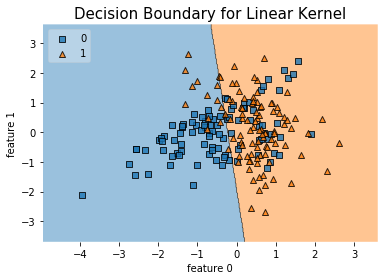

In [74]:
#Using Linear type Kernel for predicting the class
SVML_Kernel=svm.SVC(kernel='linear')
SVML_Kernel.fit(X1,Y1)
SVML_Kernel.score(X1,Y1)
print(SVML_Kernel.score(X1,Y1))
plot_decision_regions(X=X1,y=Y1,clf=SVML_Kernel,legend=2)
plt.title('Decision Boundary for Linear Kernel',size=15)
plt.xlabel('feature 0',size=10)
plt.ylabel('feature 1',size=10)


0.645


Text(0,0.5,'feature 1')

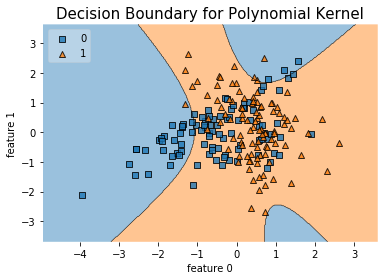

In [75]:
#Using Polynomial type Kernel for predicting the class
SVMP_Kernel=svm.SVC(kernel='poly')
SVMP_Kernel.fit(X1,Y1)
SVMP_Kernel.score(X1,Y1)
print(SVMP_Kernel.score(X1,Y1))
plot_decision_regions(X=X1,y=Y1,clf=SVMP_Kernel,legend=2)
plt.title('Decision Boundary for Polynomial Kernel',size=15)
plt.xlabel('feature 0',size=10)
plt.ylabel('feature 1',size=10)

0.625


Text(0,0.5,'feature 1')

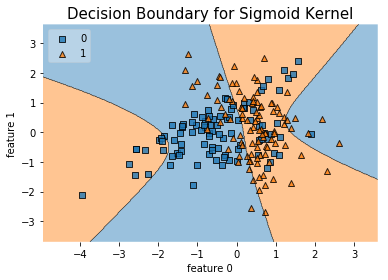

In [76]:
#Using Sigmoid type Kernel for predicting the class
SVMS_Kernel=svm.SVC(kernel='sigmoid')
SVMS_Kernel.fit(X1,Y1)
SVMS_Kernel.score(X1,Y1)
print(SVMS_Kernel.score(X1,Y1))
plot_decision_regions(X=X1,y=Y1,clf=SVMS_Kernel,legend=2)
plt.title('Decision Boundary for Sigmoid Kernel',size=15)
plt.xlabel('feature 0',size=10)
plt.ylabel('feature 1',size=10)

0.795


Text(0,0.5,'feature 1')

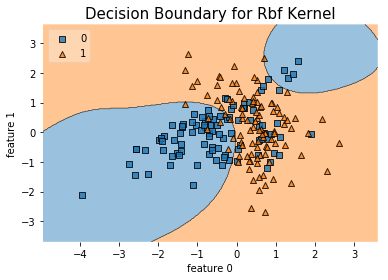

In [77]:
#Using Radial Basis Function (RBF) type Kernel for predicting the class
SVMR_Kernel=svm.SVC(kernel='rbf')
SVMR_Kernel.fit(X1,Y1)
SVMR_Kernel.score(X1,Y1)
print(SVMR_Kernel.score(X1,Y1))
plot_decision_regions(X=X1,y=Y1,clf=SVMR_Kernel,legend=2)
plt.title('Decision Boundary for Rbf Kernel',size=15)
plt.xlabel('feature 0',size=10)
plt.ylabel('feature 1',size=10)

In [78]:
## Inorder to find the best values for the C and Gamma parameters, we use the GridSearchCV function
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

#first we define the C range
Crange= np.linspace(0.1,10,100)
Gammarange=np.linspace(0.1,10,10)
bestparams=dict(C=Crange,gamma=Gammarange)
bestvalues=GridSearchCV(svm.SVC(),param_grid=bestparams,cv=None)
bestvalues.fit(X1,Y1)

print(bestvalues.best_params_,bestvalues.best_score_)

{'C': 0.4, 'gamma': 1.2000000000000002} 0.79


0.795


Text(0,0.5,'feature 1')

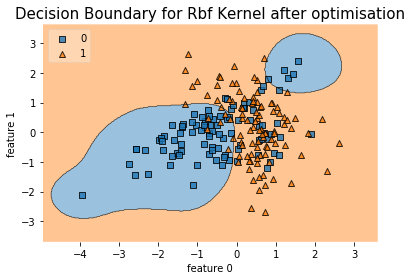

In [89]:
#now applying the obtained values from the GridSearch to the SVM Model
SVM_Kernel=svm.SVC(kernel='rbf',gamma=1.2,C=0.4)
SVM_Kernel.fit(X1,Y1)
SVM_Kernel.score(X1,Y1)
print(SVM_Kernel.score(X1,Y1))
plot_decision_regions(X=X1,y=Y1,clf=SVM_Kernel,legend=2)
plt.title('Decision Boundary for Rbf Kernel after optimisation',size=15)
plt.xlabel('feature 0',size=10)
plt.ylabel('feature 1',size=10)
#we see that there is a change in the accuracy when we fine tune the C and gamma Parameter.

In [86]:
#Fitting the above model over the test data
filenameToRead1 = '5challenge_testing_' + student_identity + '.csv'
testing_df=pd.read_csv("C:/Users/harish/Documents/GitHub/ECEN689-Fall2018/Challenges/5Files/"+ filenameToRead1)

X2= testing_df[['Feature 0', 'Feature 1']].values
testing=SVM_Kernel.predict(X2)
testing_df['Class']=testing
testing_df = testing_df.drop(['Unnamed: 0'],axis=1)
testing_df.head(10)





,Class,Feature 0,Feature 1
0,0,-1.605924,-0.164963
1,1,0.560600,0.594020
2,1,0.338864,-1.378238
3,0,2.005715,2.192058
4,0,-1.119918,-1.075739
5,1,1.633491,-0.053227
6,1,0.577607,1.686186
7,1,0.383079,-2.507160
8,1,1.060105,0.401246
9,0,-0.800906,0.194591


In [90]:
testing_df.to_csv("C:/Users/harish/Documents/GitHub/ECEN689-Fall2018/Challenges/5Files/5challenge_testing_chharish775.csv",index=False)